In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Melbourne_housing.csv')

In [3]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
#Load the dataframe with hostid as index
X_train = pd.read_csv('Melbourne_housing.csv', na_values=np.nan, index_col=None)
#Drop duplicate index
X_train = X_train[~X_train.index.duplicated(keep = 'first')]

In [5]:
X_train

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [6]:
X_train.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
X_train.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
X_train['Rooms'] = X_train['Rooms'].astype(float)
X_train.dtypes

Suburb            object
Address           object
Rooms            float64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [9]:
cat_features = [c for c in X_train.columns if X_train[c].dtype in ['object']]
print("Categorical Columns Unique values \n", X_train[cat_features].nunique())

Categorical Columns Unique values 
 Suburb           351
Address        34009
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64


In [10]:
X_train.drop(['Address','SellerG','Suburb','Date','CouncilArea','Lattitude','Longtitude'], axis=1, inplace=True)
X_train.dropna(subset=['Price'], axis=0, inplace=True)

In [11]:
X_train

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
1,2.0,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0
2,2.0,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0
4,3.0,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0
5,3.0,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0
6,4.0,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4.0,h,1480000.0,PI,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Western Metropolitan,6543.0
34853,2.0,h,888000.0,SP,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Western Metropolitan,6543.0
34854,2.0,t,705000.0,S,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Western Metropolitan,6543.0
34855,3.0,h,1140000.0,SP,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,6543.0


In [12]:
# 1. INTEGRATING WITH PIPELINE METHOD
continuous_features = list(X_train.columns[X_train.dtypes == 'float64']) 
cat_features = [c for c in X_train.columns if X_train[c].dtype in ['object']]

In [13]:
cont_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])




cate_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('encoder', OneHotEncoder())])






preprocessor = ColumnTransformer(
    transformers = [
        ('continuus', cont_pipeline, continuous_features),
        ('categorical', cate_pipeline, cat_features)
        
    ]
)



X_train_1 = preprocessor.fit_transform(X_train.astype(str))

In [14]:
#Fetching the categorical feature names that were one hot encoded
cato_features = preprocessor.transformers_[1][1]\
.named_steps['encoder'].get_feature_names(cat_features)

In [15]:
#Concatenating the features along with other variables
labels = np.concatenate([continuous_features, cato_features])

In [16]:
labels[:]

array(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount',
       'Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Regionname_Eastern Metropolitan',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Western Victoria',
       'Regionname_nan'], dtype=object)

In [17]:
#Dataset can be taken for Machine Learning now
df1 = pd.DataFrame(X_train_1, columns=labels)

Text(0, 0.5, 'Counts')

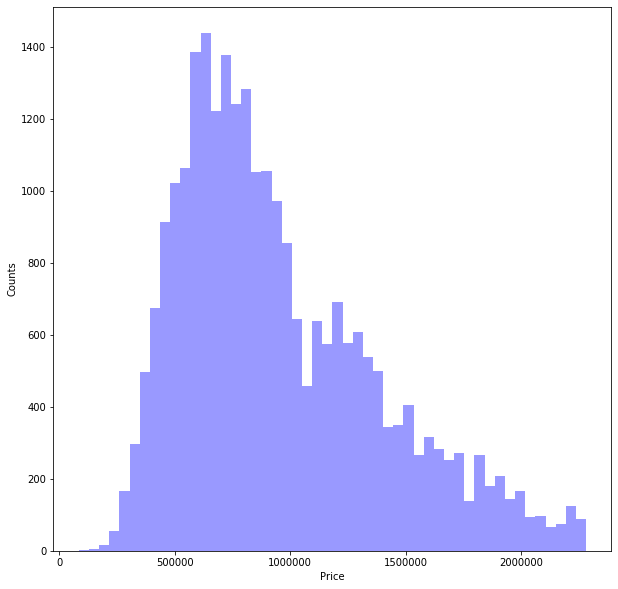

In [18]:
quantile_1 = df1['Price'].quantile(0.25)
quantile_3 = df1['Price'].quantile(0.75)
IQR = quantile_3-quantile_1
Lower_Whisker = quantile_1 - 1.5*IQR
Upper_Whisker = quantile_3 + 1.5*IQR
df1 = df1[(df1['Price']>Lower_Whisker)&(df1['Price']<Upper_Whisker)]
plt.figure(figsize=(10,10))
sns.distplot(df1['Price'],hist=True, kde=False, color='blue')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

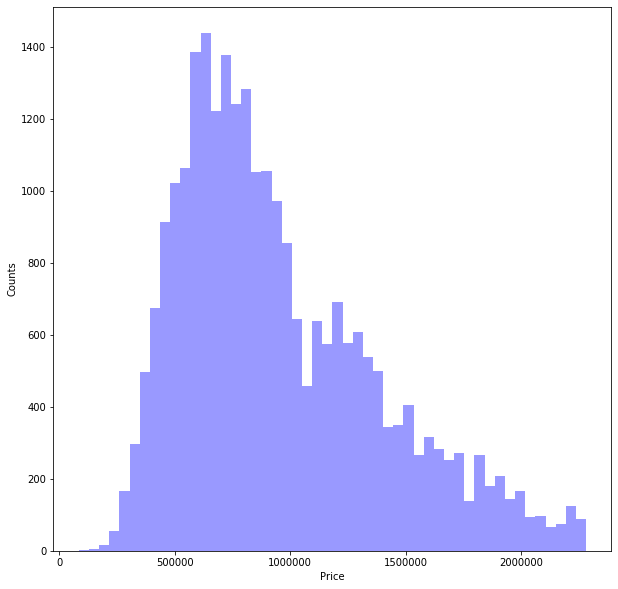

In [19]:
plt.figure(figsize=(10,10))
sns.distplot(df1['Price'],hist=True, kde=False, color='blue')
plt.ylabel('Counts')

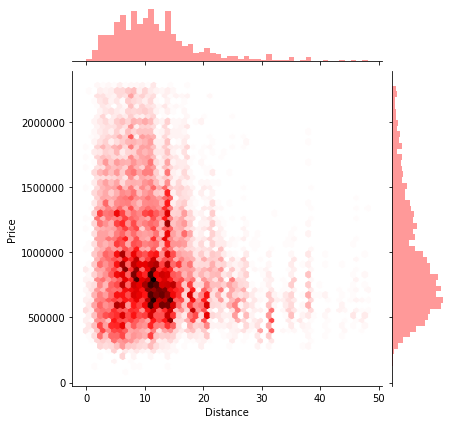

In [20]:
sns.jointplot('Distance', 'Price', data=df1, kind='hex', color='red')

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

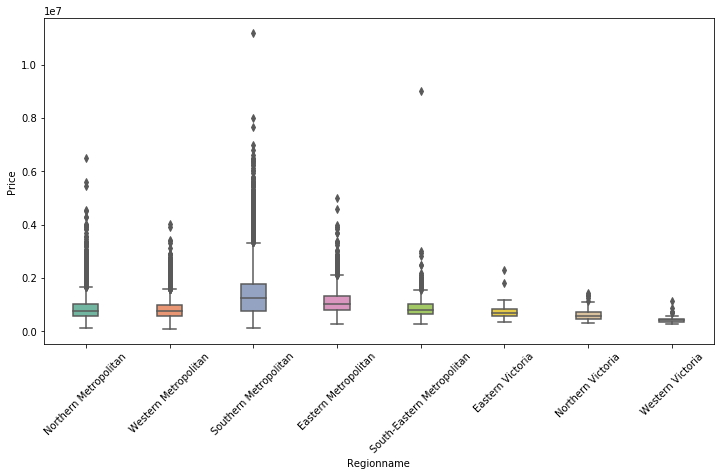

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot('Regionname', 'Price', data=df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
df['Regionname'].value_counts()

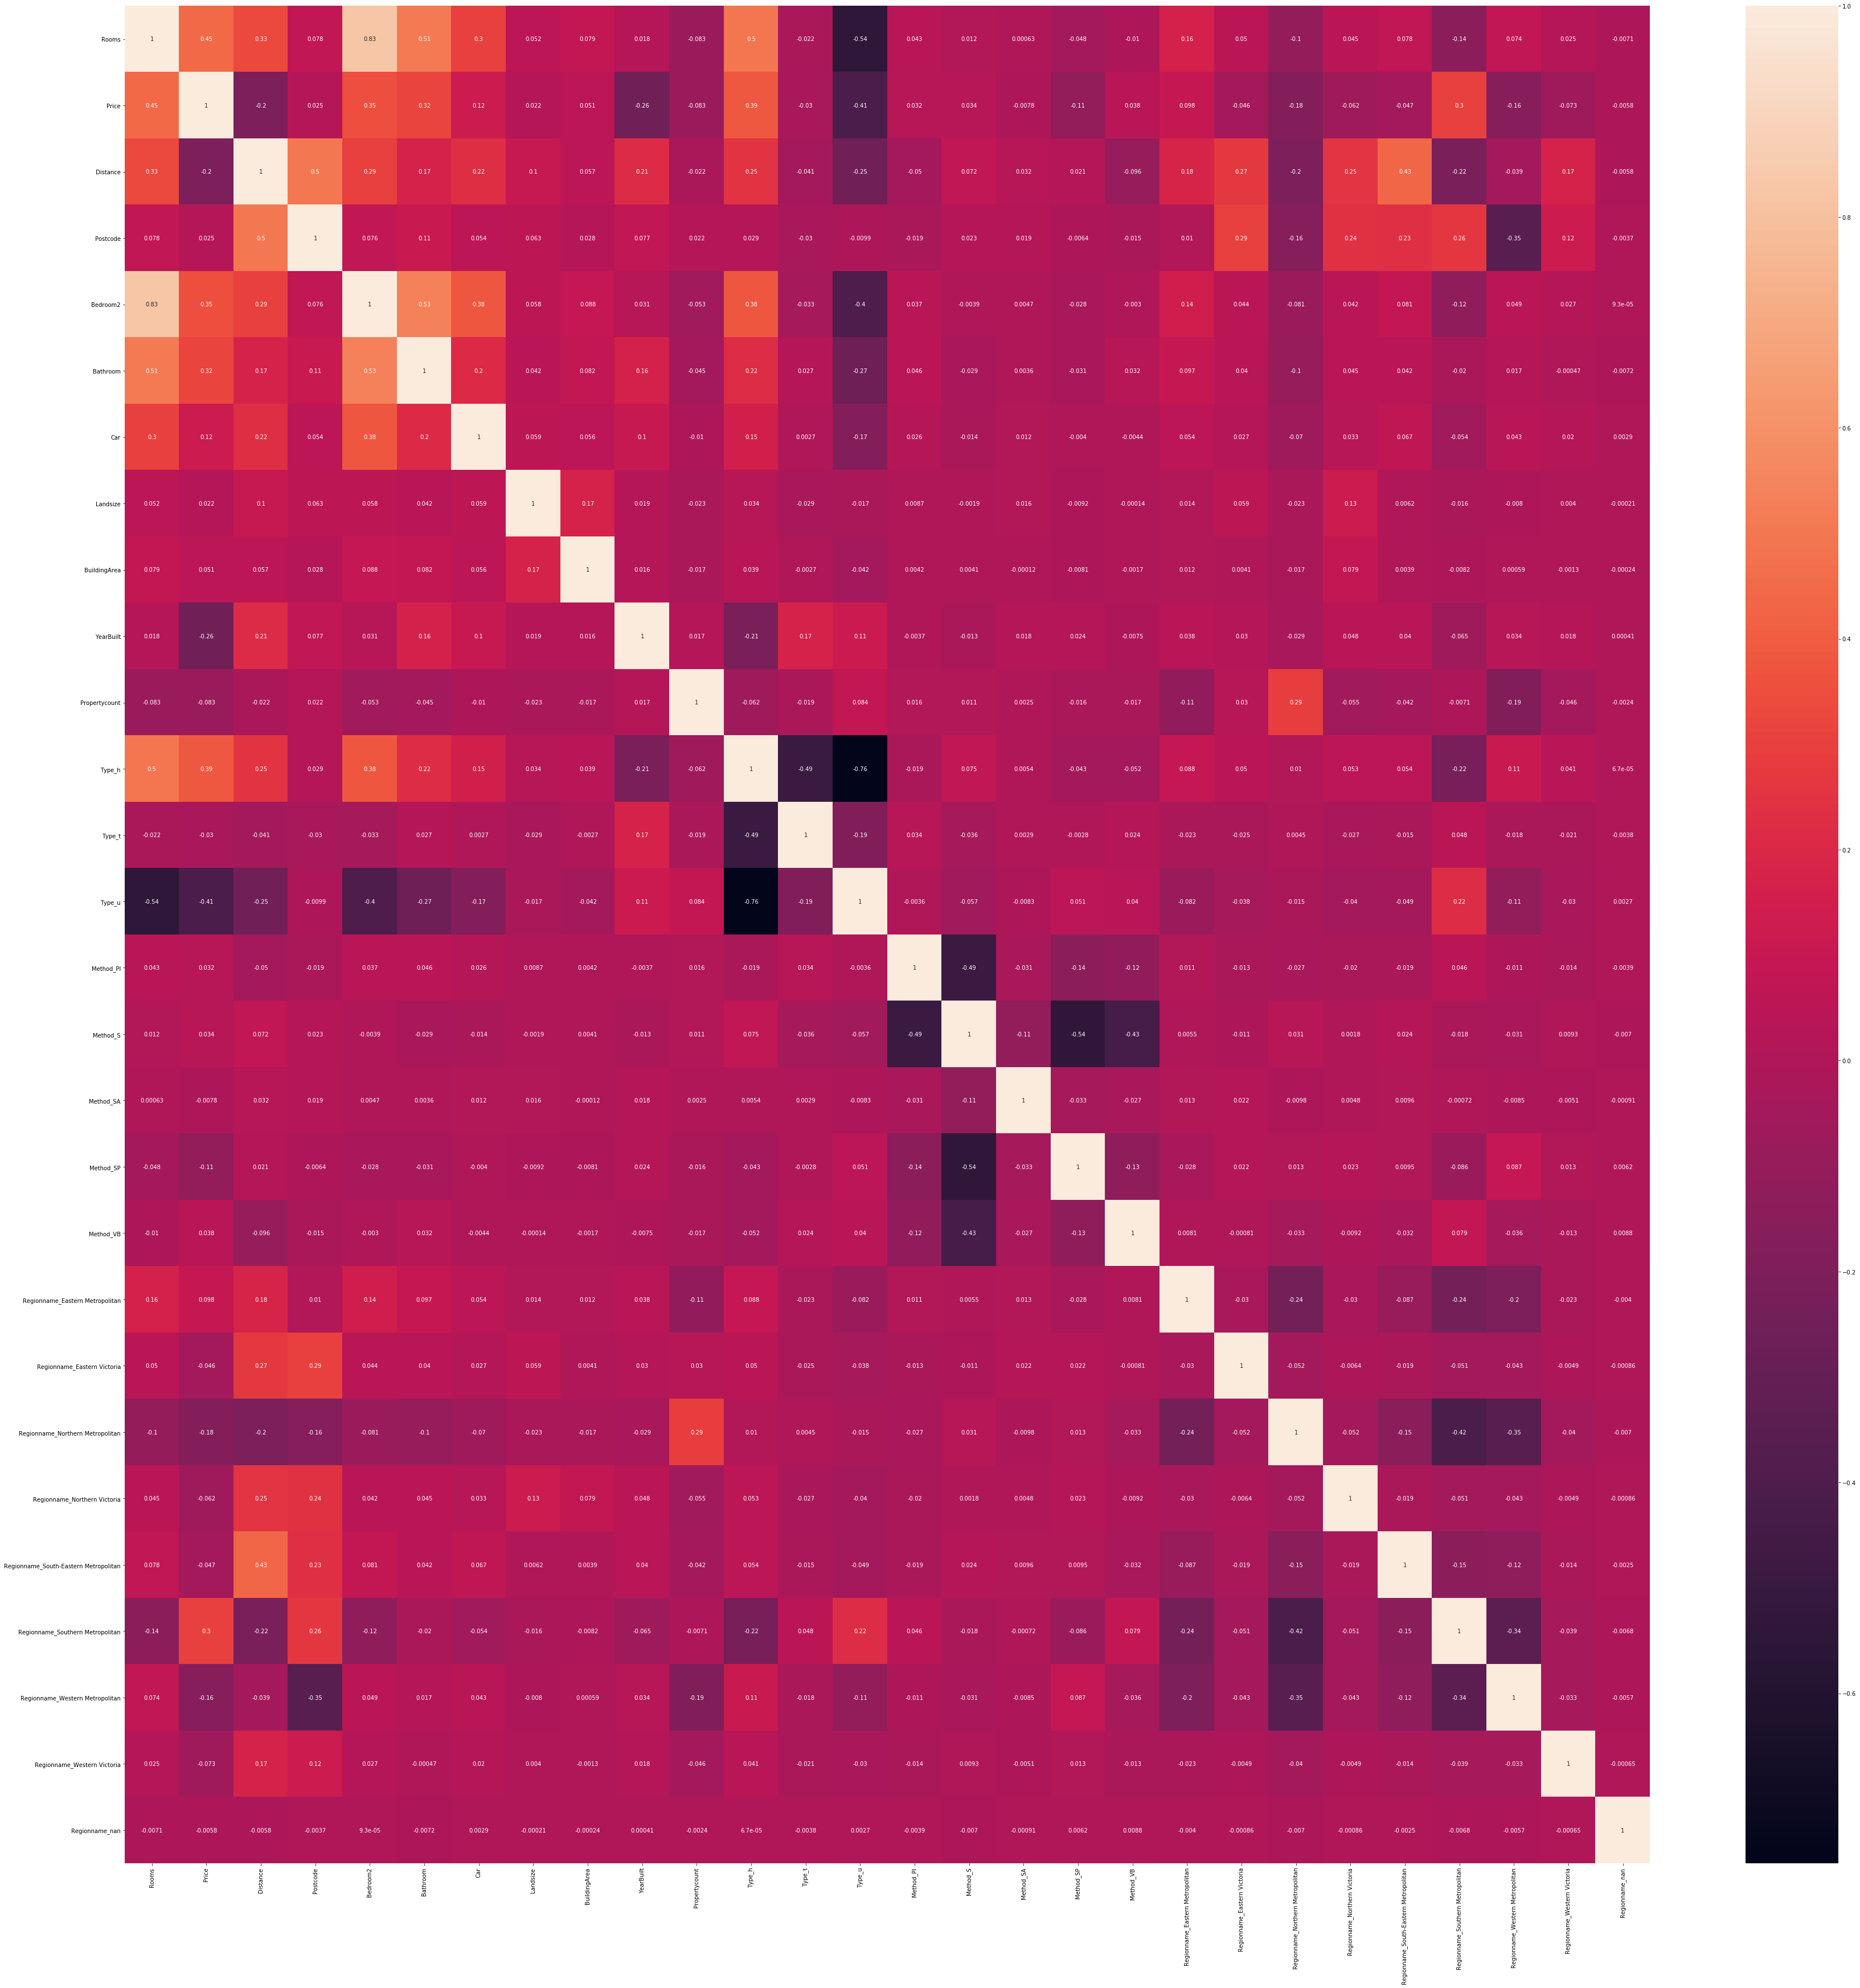

In [22]:
fig,ax = plt.subplots(figsize=(60,60))
sns.heatmap(df1.corr(),annot=True)

          Rooms  Price  Distance  Postcode  Bedroom2  Bathroom       Car  \
Price  0.465238    1.0 -0.211384   0.04495  0.430275  0.429878  0.201803   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
Price  0.032748      0.100754  -0.333306  -0.215607    0.197874      -0.059017  


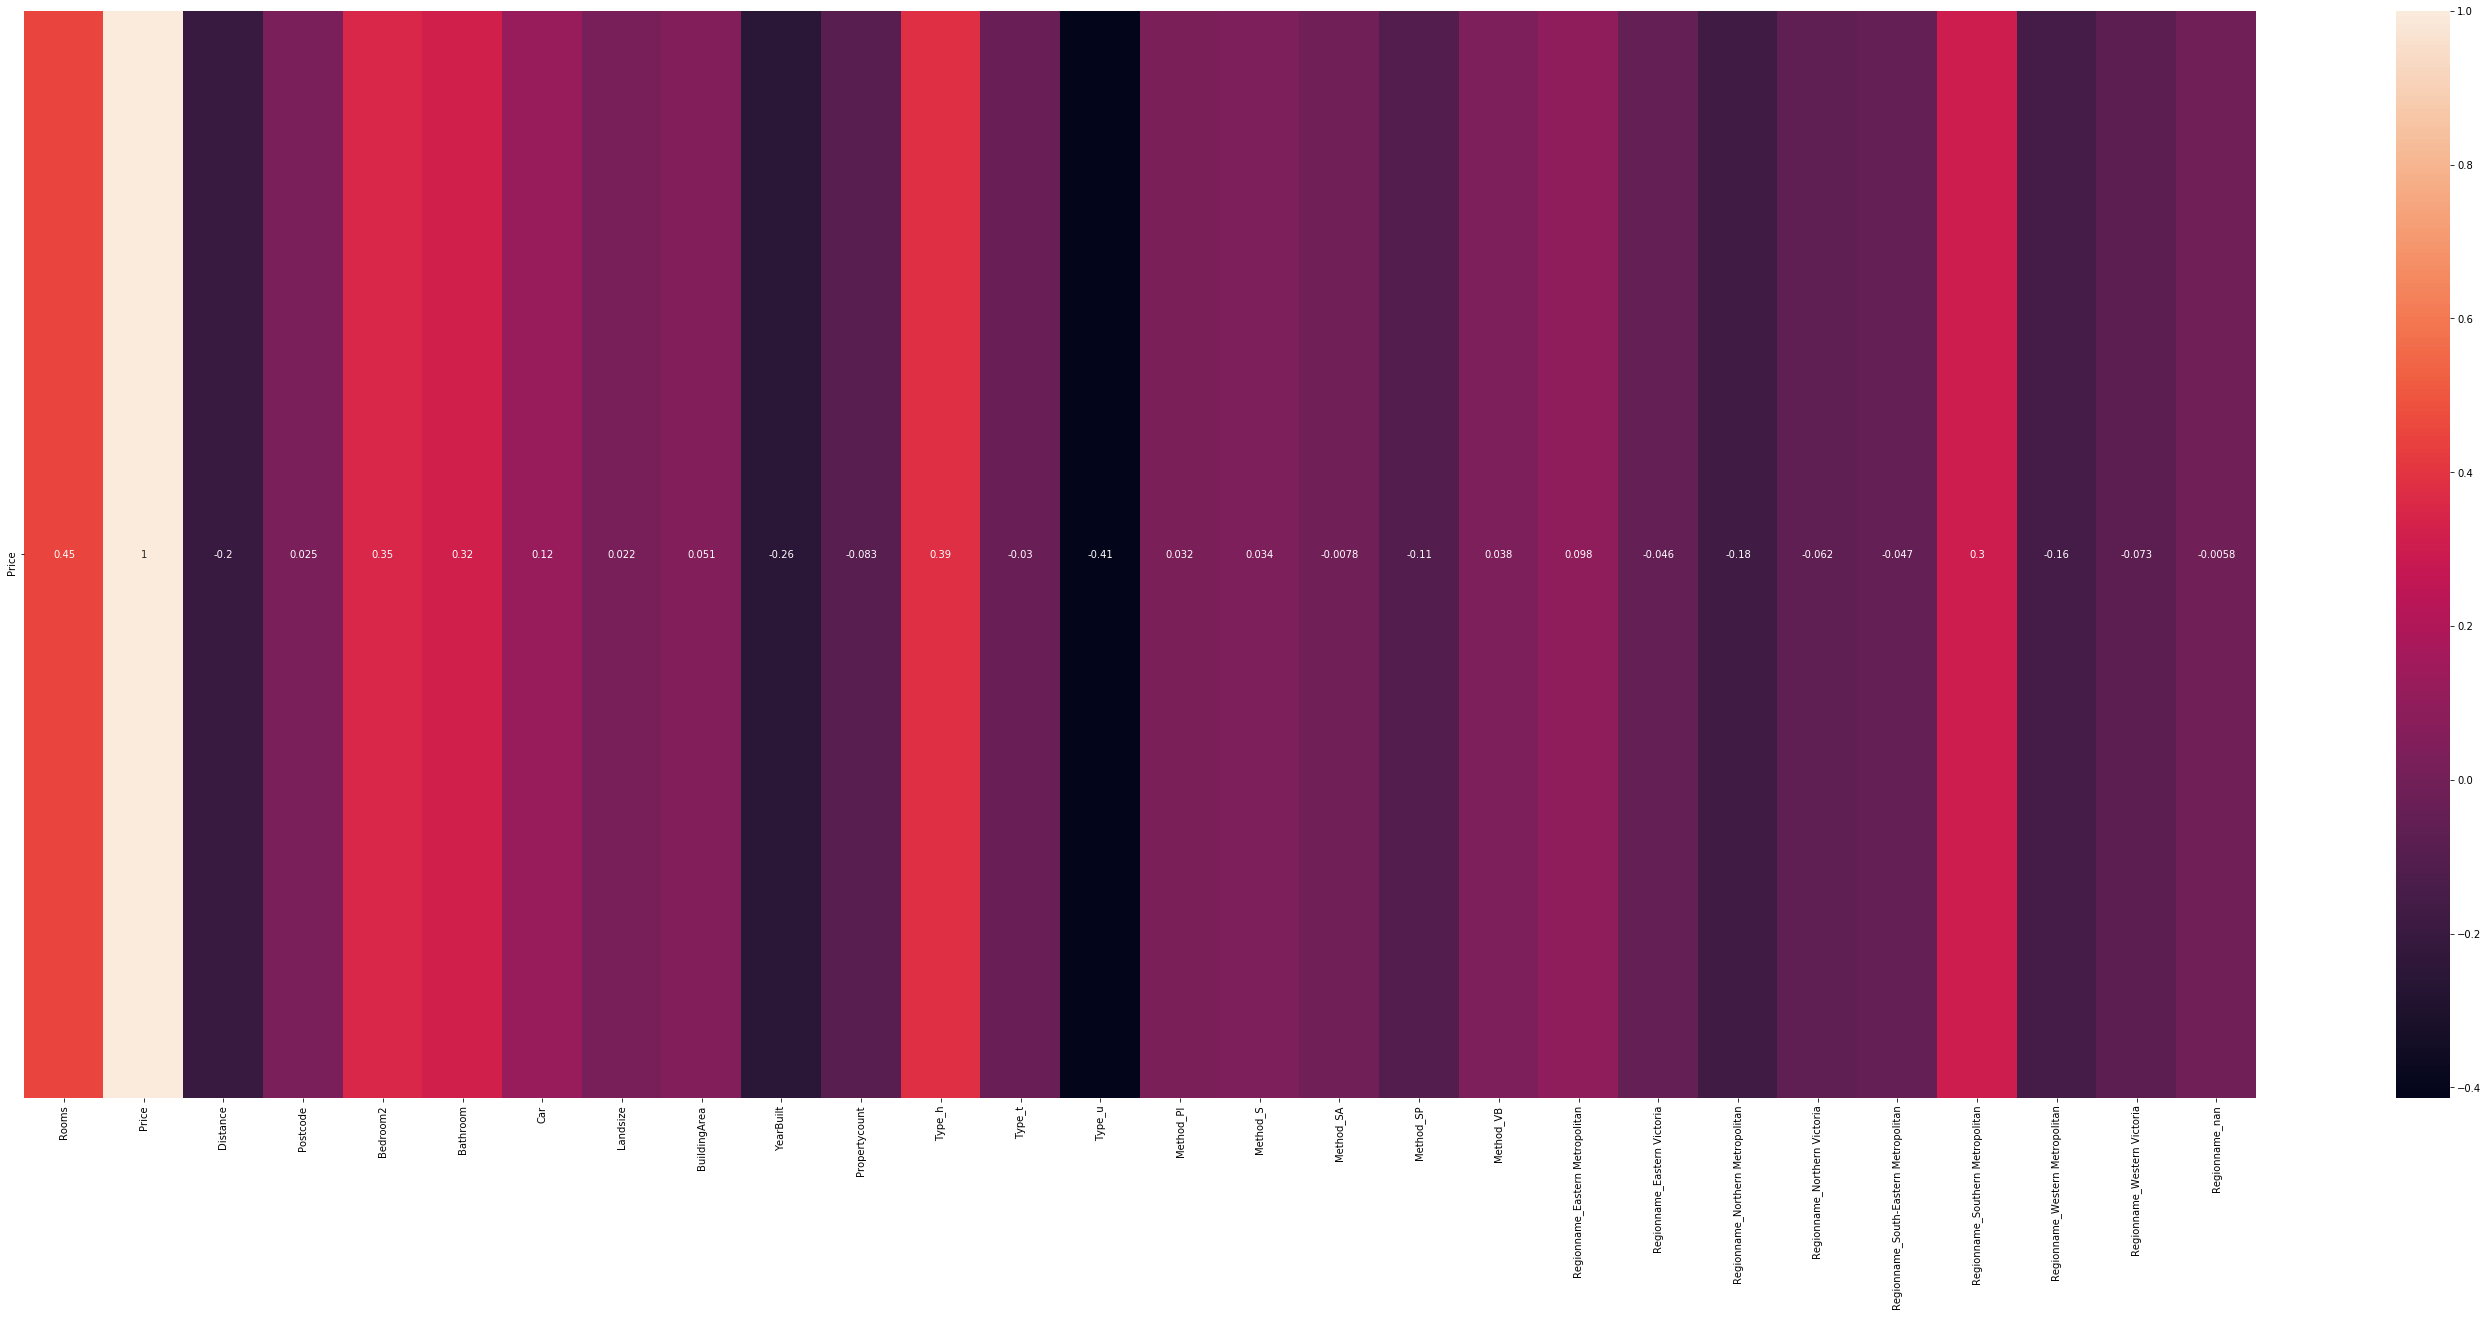

In [23]:
#checking correlation with Price
fig,ax = plt.subplots(figsize=(50,20))
sns.heatmap(df1.corr().loc[['Price'],:],annot=True)
print(df.corr().loc[['Price'],:])

In [24]:
x = df1.drop(['Price'],axis=1)
y = df1['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=10)

In [25]:
# fitting linear regression to training data
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train,y_train)
  
# this gives the coefficients of the our features in the visualisation above  
print(regressor.coef_)

[ 1.72434062e+05 -3.29567015e+04  2.01689332e+02 -2.01103593e+04
  7.98347768e+04  2.66465371e+04  6.61451364e+00  2.37647007e+01
 -1.99934841e+03  4.39970122e-02  1.82006655e+05  3.18072400e+04
 -2.13813895e+05 -1.64466611e+04  3.03570243e+04  3.46704847e+03
 -3.94681023e+03 -1.34306014e+04  7.86649146e+04  1.94100915e+05
 -1.78056715e+05  6.82392597e+04  1.89726538e+05  1.83910782e+05
 -2.14146525e+05 -9.93269989e+04 -2.23112170e+05]


In [26]:
#actual values of our training data
train_pred = regressor.predict(x_train)
print(train_pred)
#predictions of our model
test_pred = regressor.predict(x_test) 
print(test_pred)

[ 865117.78895059 1365539.25486587  975562.81506906 ... 1211792.26441361
  951884.51931564  418680.95071542]
[ 828990.90505953 1442670.35192558  652630.75502936 ...  328422.69335607
  328684.36439543  957549.39075602]


In [27]:
from sklearn.metrics import mean_squared_error
# calculating rmse (root mean squared error)
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
#print values of train_rmse
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)
#rounding off the predicted values for test data
predicted_data = np.round_(test_pred)
print(predicted_data)
coeffecients = pd.DataFrame(regressor.coef_,x.columns) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

267129.36445465835
272007.9418598382
[ 828991. 1442670.  652631. ...  328423.  328684.  957549.]
                                         Coeffecient
Rooms                                  172434.061561
Distance                               -32956.701545
Postcode                                  201.689332
Bedroom2                               -20110.359315
Bathroom                                79834.776758
Car                                     26646.537090
Landsize                                    6.614514
BuildingArea                               23.764701
YearBuilt                               -1999.348410
Propertycount                               0.043997
Type_h                                 182006.655259
Type_t                                  31807.239995
Type_u                                -213813.895253
Method_PI                              -16446.661125
Method_S                                30357.024258
Method_SA                                3467.048465
Me

In [28]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, test_pred), 2))
print('Square Root of MSE:',np.sqrt(sm.mean_squared_error(y_test, test_pred)))

R2 score = 0.61
Square Root of MSE: 272007.9418598382


(0, 2605253.1250799038)

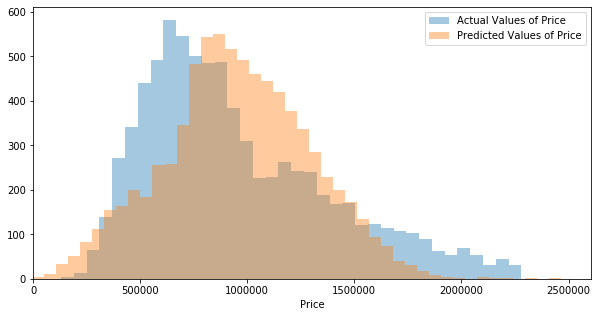

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, hist=True, kde=False)
sns.distplot(test_pred, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)

RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

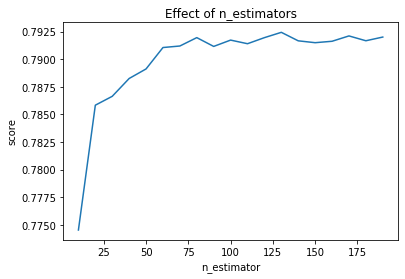

In [32]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, test_pred), 2))
print('Square Root of MSE:',np.sqrt(sm.mean_squared_error(y_test, test_pred)))

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, hist=True, kde=False)
sns.distplot(test_pred, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)

[0.7745349528290261,
 0.7858357976070667,
 0.7866390318424291,
 0.7882530246435755,
 0.7891176119165326,
 0.7910557668514809,
 0.7911943039589454,
 0.791953133962231,
 0.7911565272098668,
 0.7917289768574359,
 0.791401544627039,
 0.7919512411095603,
 0.7924316200151257,
 0.7916627268629071,
 0.7914938234432193,
 0.7916226455611339,
 0.7921069892035689,
 0.7916692796189352,
 0.7920041619178352]

In [35]:
reg = RandomForestRegressor()
reg.fit(x_train,y_train)
  
# this gives the coefficients of the our features in the visualisation above  
print(reg.coef_)

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'